# Digital Tools for Finance - Python Notebook

This is the final notebook of
- Lucille Dauer  xx-xxx-xxx
- Nicolas Profumo   19-419-290
- Pierre Angevin xx-xxx-xxx
- Bastien Tognolini xx-xxx-xxx

for the course Digital Tools for Finance at UZH.

## 1. Data Importation and Cleaning

In [110]:
# Import useful modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [111]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\nicol\OneDrive\Documents\Master_2_UZH\Digital_Tools_for_Finance\DTFF-project\code\notebook


In [112]:
# Load the product annoucement dates from Excel sheet -> don't forget to check current directory or provide full path if necessary

df = pd.read_excel('C:/Users/nicol/OneDrive/Documents/Master_2_UZH/Digital_Tools_for_Finance/DTFF-project/Data/announcements.xlsx')
df.head()

,Company,Date,Announcement
0,TSLA,2014-01-30,Model S P85D
1,NVDA,2014-03-08,NVDA GeForce GTX 800M Series
2,META,2014-04-30,Facebook Paper
3,AMZN,2014-06-18,AMZN Fire Phone
4,NVDA,2014-09-02,GeForce GTX 980 and GTX 970


In [113]:
# Useful insights about the dataframe: the number of rows and columns, the data types and the column labels

print(df.shape)
print(df.dtypes)
print(df.columns) 

(184, 3)
Company                  object
Date             datetime64[ns]
Announcement             object
dtype: object
Index(['Company', 'Date ', 'Announcement '], dtype='object')


In [114]:
# Rename columns because there seems to be unexpected spaces

df.columns = ['Name', 'Date', 'Announcement']

In [115]:
# Load the stock prices 

df_1 = pd.read_excel('C:/Users/nicol/OneDrive/Documents/Master_2_UZH/Digital_Tools_for_Finance/DTFF-project/Data/Stock_Prices.xlsx')
df_1.head()

,Name,2013-12-31 00:00:00,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00,2014-01-09 00:00:00,2014-01-10 00:00:00,...,2023-12-18 00:00:00,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00
0,APPL,17691.13,17691.13,17442.33,17059.20,17152.22,17029.47,17137.40,16918.52,16805.66,...,197291.60,198349.10,196224.10,196073.00,194985.30,194985.30,194431.30,194532.00,194965.10,193907.60
1,NVDA,1004.27,1004.27,994.24,982.33,995.49,1011.79,1025.58,987.34,986.09,...,133078.10,131821.10,127853.50,130189.30,129764.20,129764.20,130957.40,131324.10,131603.10,131603.10
2,MSFT,52155.35,52155.35,51806.81,51458.27,50370.83,50761.19,49855.00,49534.35,50245.36,...,616923.50,617933.60,613563.20,618397.10,620118.90,620118.90,620251.10,619274.60,621277.70,622535.90
3,AMZN,20363.73,20363.73,20321.87,20243.74,20100.25,20324.92,20523.57,20477.09,20306.04,...,157348.10,157062.10,155356.60,157113.20,156684.30,156684.30,156674.00,156602.50,156643.40,155172.80
4,GOOG,1116.97,1116.97,1109.40,1101.31,1113.59,1135.05,1137.42,1126.47,1126.41,...,5408.61,5442.47,5509.78,5592.62,5635.23,5635.23,5636.43,5590.63,5585.05,5563.55


In [116]:
# Reshaping the daily stock prices DataFrame --> here, 'Date' and 'StockPrice' are new variables

df_1 = df_1.melt(id_vars=['Name'], 
                    var_name='Date', 
                    value_name='StockPrice')
df_1.head()

,Name,Date,StockPrice
0,APPL,2013-12-31 00:00:00,17691.13
1,NVDA,2013-12-31 00:00:00,1004.27
2,MSFT,2013-12-31 00:00:00,52155.35
3,AMZN,2013-12-31 00:00:00,20363.73
4,GOOG,2013-12-31 00:00:00,1116.97


In [117]:
# Useful insights about the dataframe: the number of rows and columns, the data types and the column labels

print(df_1.shape)
print(df_1.dtypes)
print(df_1.columns) 

(26090, 3)
Name           object
Date           object
StockPrice    float64
dtype: object
Index(['Name', 'Date', 'StockPrice'], dtype='object')


In [118]:
# Make sure 'Date' columns for both dataframes are datetime type

df['Date'] = pd.to_datetime(df['Date'])
df_1['Date'] = pd.to_datetime(df_1['Date'])

In [119]:
# Merge both dataframes on 'Name' and 'Date'

# /!\ Keep in mind that we will lose the 2024 announcement dates during the merging because the stock prices ends in 2023
df = pd.merge(df, df_1, on=['Name', 'Date'], how='right')

# Here we just want to sort by company names and dates in order to facilitate the later computations, we also reset the index
df = df.sort_values(by=['Name', 'Date']).reset_index(drop=True)

df.head()

,Name,Date,Announcement,StockPrice
0,AMZN,2013-12-31,NaN,20363.73
1,AMZN,2014-01-01,NaN,20363.73
2,AMZN,2014-01-02,NaN,20321.87
3,AMZN,2014-01-03,NaN,20243.74
4,AMZN,2014-01-06,NaN,20100.25


In [120]:
# Useful insights about the final dataframe: the number of rows and columns, the data types and the column labels

print(df.shape)
print(df.dtypes)
print(df.columns) 

(26090, 4)
Name                    object
Date            datetime64[ns]
Announcement            object
StockPrice             float64
dtype: object
Index(['Name', 'Date', 'Announcement', 'StockPrice'], dtype='object')


In [121]:
# Here is to make sure that the merging did its work and there is not only nans in the 'Announcement' column

non_nan_announcement = df[df['Announcement'].notna()]
len(non_nan_announcement)

155

In [122]:
# Count missing values for each column

missing_values = df.isna().sum()


# Identify potential rows where the 'StockPrice' has a value of zero --> would be inconsistent

zero_values = df[df['StockPrice'] == 0.0]


# Identify potential rows where the 'StockPrice' has a negative value

negative_values = df[df['StockPrice'] < 0]

# print the outputs
print(missing_values)
print(zero_values)
print(negative_values)

Name                0
Date                0
Announcement    25935
StockPrice          0
dtype: int64
Empty DataFrame
Columns: [Name, Date, Announcement, StockPrice]
Index: []
Empty DataFrame
Columns: [Name, Date, Announcement, StockPrice]
Index: []


## 2. Compute Daily Returns and Volatilities

In [124]:
# Calculate daily returns and 10 day rolling volatility for each firm 

df['Daily_Return'] = df.groupby('Name')['StockPrice'].pct_change()

df['Rolling_Volatility'] = df.groupby('Name')['Daily_Return'].rolling(window=10).std().reset_index(0, drop=True)

df.head()

,Name,Date,Announcement,StockPrice,Daily_Return,Rolling_Volatility
0,AMZN,2013-12-31,NaN,20363.73,NaN,NaN
1,AMZN,2014-01-01,NaN,20363.73,0.000000,NaN
2,AMZN,2014-01-02,NaN,20321.87,-0.002056,NaN
3,AMZN,2014-01-03,NaN,20243.74,-0.003845,NaN
4,AMZN,2014-01-06,NaN,20100.25,-0.007088,NaN


In [125]:
# Count missing values for each column

missing_values = df.isna().sum()


print(missing_values)
# we get 10 nan values for the returns because there is 10 companies so the first return is always nan
# we get 100 = 10*10 for the rolling volatility because it must contain 10 elements before computing the first volatility

Name                      0
Date                      0
Announcement          25935
StockPrice                0
Daily_Return             10
Rolling_Volatility      100
dtype: int64


In [126]:
# Drop rows where 'Daily_Return' or 'Rolling_Volatility' is NaN

# /!\ Keep in mind that we will lose all the first 10 observations for each firms so 100 rows in total
df = df.dropna(subset=['Daily_Return', 'Rolling_Volatility'])

df.head()

,Name,Date,Announcement,StockPrice,Daily_Return,Rolling_Volatility
10,AMZN,2014-01-14,NaN,20299.90,0.016778,0.010152
11,AMZN,2014-01-15,NaN,20214.63,-0.004201,0.010226
12,AMZN,2014-01-16,NaN,20211.05,-0.000177,0.010216
13,AMZN,2014-01-17,NaN,20405.61,0.009626,0.010606
14,AMZN,2014-01-20,NaN,20405.61,0.000000,0.010248


In [127]:
# Count missing values for each column

missing_values = df.isna().sum()


print(missing_values)
# everything seemed to have worked as expected

Name                      0
Date                      0
Announcement          25835
StockPrice                0
Daily_Return              0
Rolling_Volatility        0
dtype: int64


## 3. Descriptive Statistics and Data Visualization

### 3.1 Descriptive Statistics of the Daily Returns

In [130]:
# Compute descriptive statistics of the returns for each firm

descriptive_stats = df.groupby('Name')['Daily_Return'].agg([
    ('Mean (%)', lambda x: x.mean() * 100),
    ('Std (%)', lambda x: x.std() * 100),
    ('Min (%)', lambda x: x.min() * 100),
    ('Max (%)', lambda x: x.max() * 100)
]).round(3)


print("Daily risk-return tradeoff analysis for the top 10 tech firms over the last 10 years")
print(descriptive_stats)

Daily risk-return tradeoff analysis for the top 10 tech firms over the last 10 years
       Mean (%)  Std (%)  Min (%)  Max (%)
Name                                      
AMZN      0.100    2.055  -14.049   14.131
APPL      0.109    1.758  -12.865   11.981
AVGO      0.151    2.156  -19.913   15.834
GOOG      0.077    1.727  -11.634   16.259
META      0.098    2.315  -26.390   23.283
MSFT      0.112    1.675  -14.739   14.217
NVDA      0.230    2.872  -18.756   29.807
TECHY     0.070    2.189  -12.418   23.261
TSLA      0.186    3.447  -21.063   19.895
TSMC      0.091    1.617   -8.870   10.337


### 3.2 Cumulative Performance Analysis

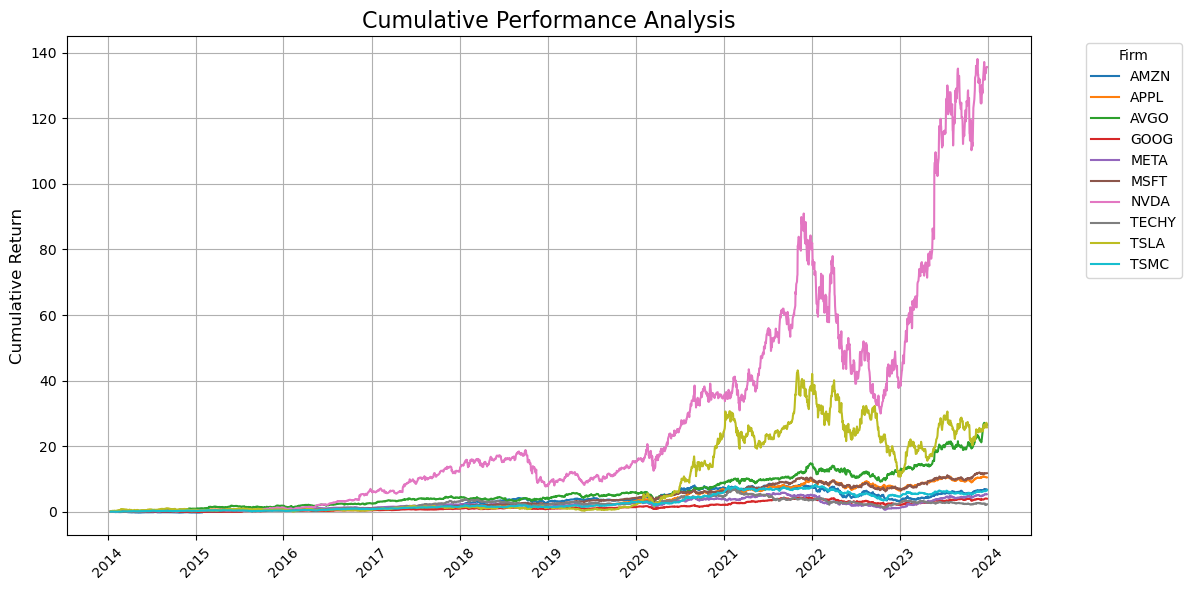

In [132]:
# Group by 'Name' and calculate cumulative returns
df['Cumulative_Return'] = (1 + df['Daily_Return']).groupby(df['Name']).cumprod() - 1


# Plot cumulative returns for each firm
plt.figure(figsize=(12, 6))
for name, group in df.groupby('Name'):
    plt.plot(group['Date'], group['Cumulative_Return'], label=name)


# Customize the plot
plt.title('Cumulative Performance Analysis', fontsize=16)
plt.xlabel('')
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend(title='Firm', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)

# Save the plot as a .png file
output_file = 'C:/Users/nicol/OneDrive/Documents/Master_2_UZH/Digital_Tools_for_Finance/DTFF-project/code/output/cum_perf_analysis.png'  
plt.savefig(output_file, format='png')

# Show the plot
plt.tight_layout()
plt.show()

### 3.3 Volatility Analysis

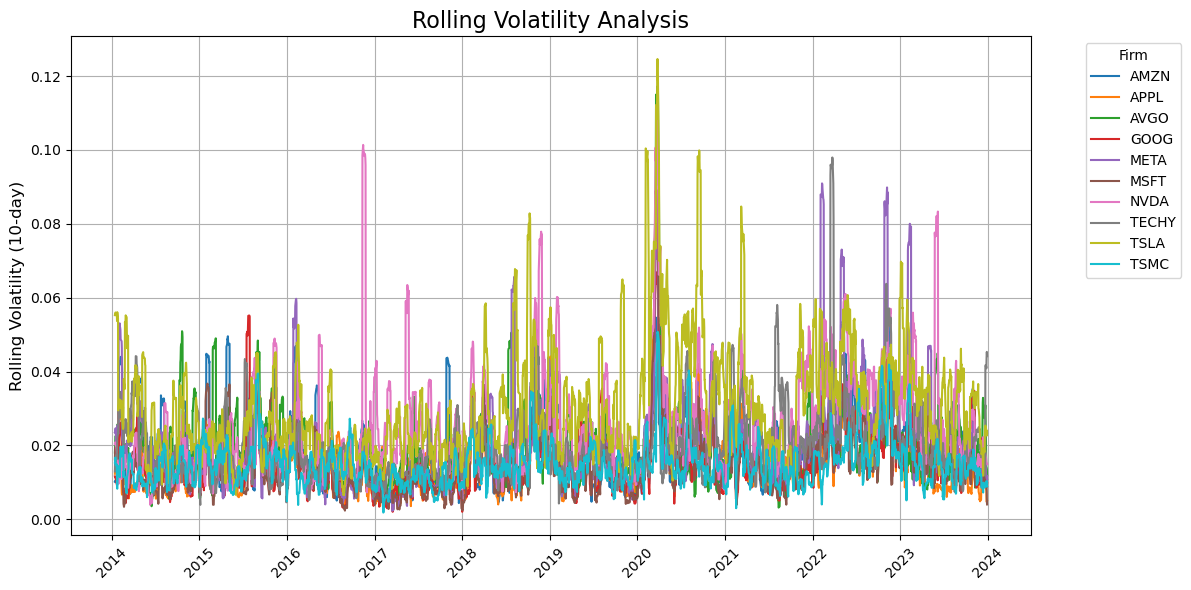

In [153]:
# Plot the rolling volatility for each firm
plt.figure(figsize=(12, 6))


# Loop through each unique firm and plot the rolling volatility
for firm in df['Name'].unique():
    firm_data = df[df['Name'] == firm]
    plt.plot(firm_data['Date'], firm_data['Rolling_Volatility'], label=firm)
    

# Customize the plot
plt.title('Rolling Volatility Analysis', fontsize=16)
plt.xlabel('')
plt.ylabel('Rolling Volatility (10-day)', fontsize=12)
plt.legend(title='Firm', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)

# Save the plot as a .png file
output_file = 'C:/Users/nicol/OneDrive/Documents/Master_2_UZH/Digital_Tools_for_Finance/DTFF-project/code/output/volatility_analysis.png'  
plt.savefig(output_file, format='png')


# Show the plot
plt.tight_layout()
plt.show()

### 3.4 Spotting patterns between Volatility and Product Announcements

#### 3.4.1 Looking for patterns at the 10 year horizon

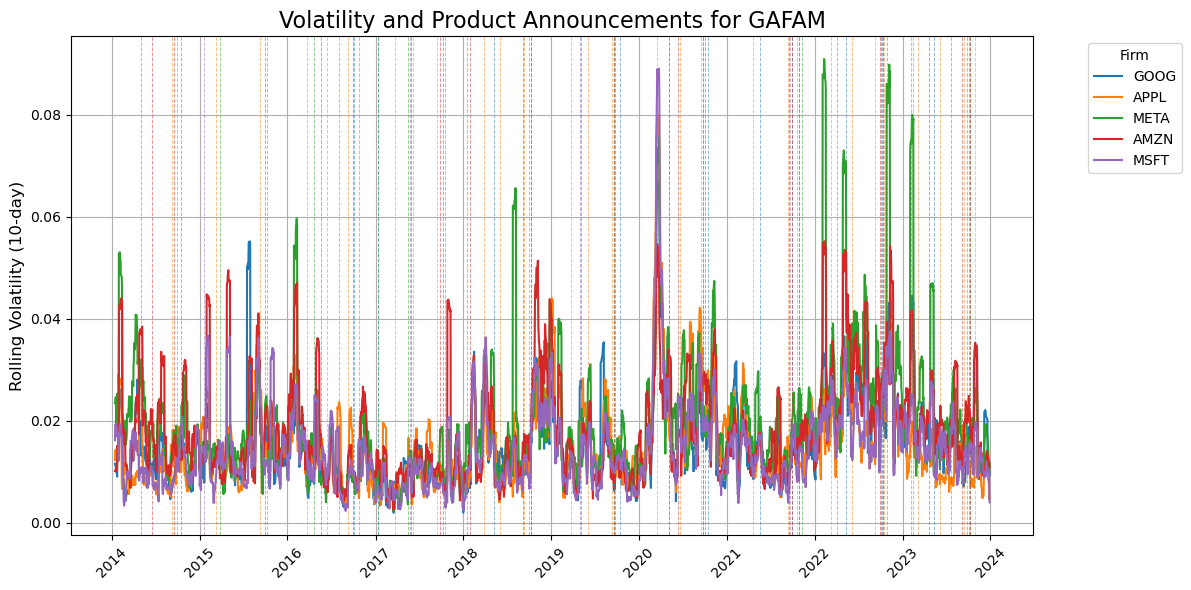

In [159]:
# Try to identify a correlation between Product Annoucements and Volatility

def plot_rolling_volatility_GAFAM(dataframe, firms, output_file=None):
    
    # Set color palette for the firms
    colors = sns.color_palette("tab10", len(firms)) 

    plt.figure(figsize=(12, 6))
    

    # Loop through the selected firms
    for idx, firm in enumerate(firms):
        
        # Filter data for the specific firm
        firm_data = dataframe[dataframe['Name'] == firm]

        # Plot rolling volatility with dynamic color for each firm
        plt.plot(firm_data['Date'], firm_data['Rolling_Volatility'], label=firm, color=colors[idx])

        # Add vertical lines for announcement dates with the same color as the line for the volatility
        announcement_data = firm_data.dropna(subset=['Announcement'])
        for date in announcement_data['Date']:
            plt.axvline(x=date, color=colors[idx], linestyle='--', alpha=0.5, linewidth=0.7)

    # Customize and display the plot
    plt.title('Volatility and Product Announcements for GAFAM', fontsize=16)
    plt.xlabel('')
    plt.ylabel('Rolling Volatility (10-day)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Firm', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside
    plt.tight_layout()
    plt.grid(True)
    
    # Save the plot if an output file is specified
    if output_file:
        plt.savefig(output_file, format='png', dpi=300)  # High-quality output
    
    # Show the plot
    plt.show()

GAFAM_list = ['GOOG', 'APPL', 'META', 'AMZN', 'MSFT']  # Replace with any firms you want to plot
plot_rolling_volatility_GAFAM(df, GAFAM_list, output_file='C:/Users/nicol/OneDrive/Documents/Master_2_UZH/Digital_Tools_for_Finance/DTFF-project/code/output/GAFAM_pattern.png')

#### 3.4.2 Looking for patterns on a shorter time horizon for a specific firm

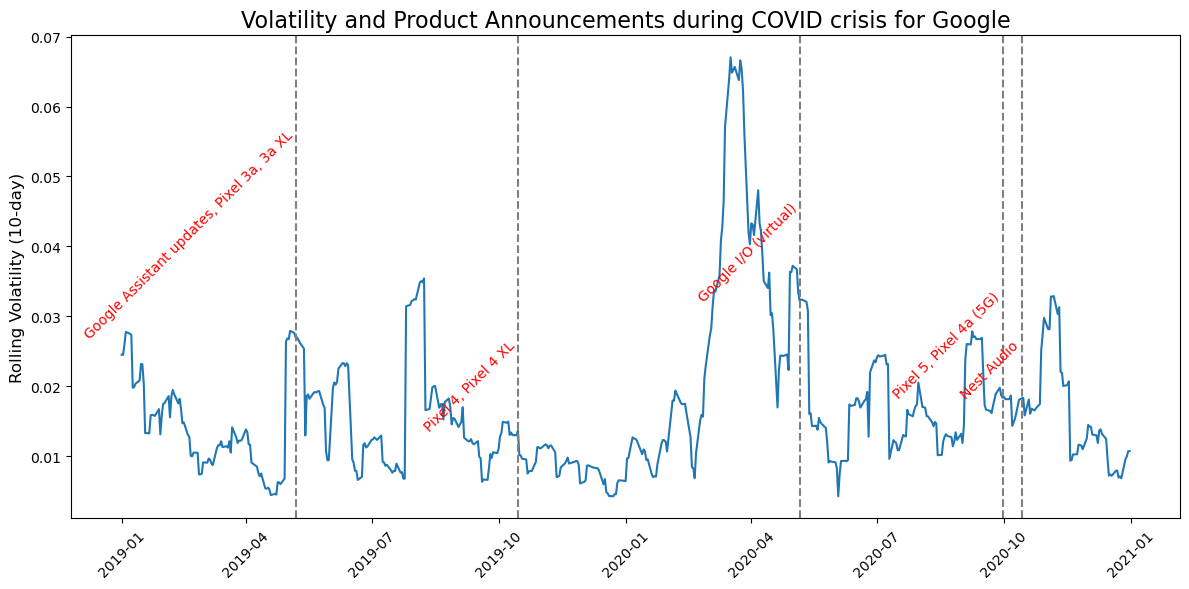

In [161]:
# Try to find a pattern on a shorter time frame eg. the COVID Crisis

plt.figure(figsize=(12, 6))

# Select desired firm and time-frame and plot the rolling volatility
firm_data = df[(df['Name'] == 'GOOG') & (df['Date'].dt.year.isin([2019, 2020]))]
plt.plot(firm_data['Date'], firm_data['Rolling_Volatility'], label='GOOG')

# Highlight the announcement dates
announcement_data = df[
    (df['Name'] == 'GOOG') & 
    (df['Date'].dt.year.isin([2019, 2020]))
].dropna(subset=['Announcement'])

for i, (_, row) in enumerate(announcement_data.iterrows()):
    # Add a vertical line at the announcement date
    plt.axvline(x=row['Date'], color='grey', linestyle='--')

    # Calculate y position for the label (shifted up)
    label_y_position = row['Rolling_Volatility']

    # Add the announcement label
    plt.text(
        x=row['Date'], 
        y=label_y_position, 
        s=row['Announcement'], 
        fontsize=10, 
        color='red', 
        rotation=45, 
        ha='right'  # Align text to the right for readability
    )

# Customize the plot
plt.title('Volatility and Product Announcements during COVID crisis for Google', fontsize=16)
plt.xlabel('')
plt.ylabel('Rolling Volatility (10-day)', fontsize=12)
plt.xticks(rotation=45)

# Save the plot as a .png file
output_file = 'C:/Users/nicol/OneDrive/Documents/Master_2_UZH/Digital_Tools_for_Finance/DTFF-project/code/output/GOOG_pattern.png'  
plt.savefig(output_file, format='png')

# Show the plot
plt.tight_layout()
plt.show()

#### 3.4.3 Looking for patterns on a daily basis for a specific TESLA Product 

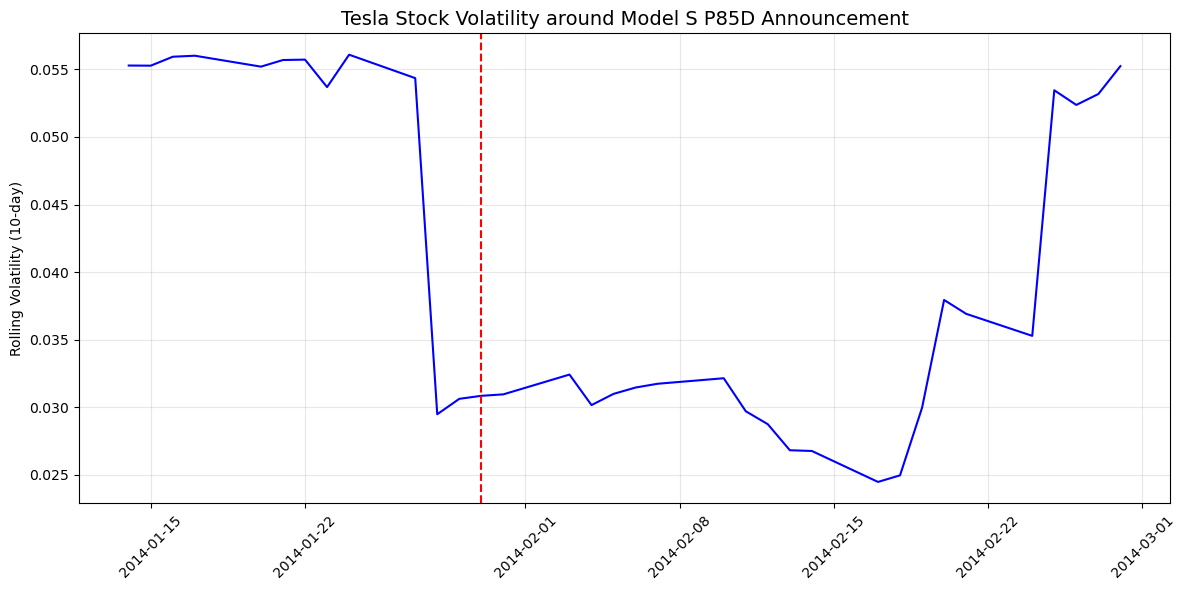

In [163]:
# Choose a specific product announcement for TESLA
announcement_date = '2014-01-30'  # Model S P85D Announcement Date

# Create a specific time frame around the announcement date e.g. 30 days
start_date = pd.to_datetime(announcement_date) - pd.Timedelta(days=30)
end_date = pd.to_datetime(announcement_date) + pd.Timedelta(days=30)

# Take the related TESLA data during the above-mentioned timeframe
tesla_data = df[
    (df['Name'] == 'TSLA') & 
    (df['Date'] >= start_date) & 
    (df['Date'] <= end_date)
]

# Initialize the plot
plt.figure(figsize=(12, 6))

# Plot rolling volatility
plt.plot(tesla_data['Date'], tesla_data['Rolling_Volatility'], color='blue')

# Add a vertical line at the announcement date
plt.axvline(x=pd.to_datetime(announcement_date), color='red', linestyle='--', 
            label='Model S P85D')

# Customize the plot
plt.title('Tesla Stock Volatility around Model S P85D Announcement', fontsize=14)
plt.xlabel('')
plt.ylabel('Rolling Volatility (10-day)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)


# Save the plot as a .png file
output_file = 'C:/Users/nicol/OneDrive/Documents/Master_2_UZH/Digital_Tools_for_Finance/DTFF-project/code/output/TESLA_pattern.png'  
plt.savefig(output_file, format='png')

# Show the plot
plt.tight_layout()
plt.show()

## 4. Linear Regression

In [36]:
# Create a binary column for announcements
df['Announcement_Binary'] = df['Announcement'].notna().astype(int)

# Select relevant columns
X = df[['Announcement_Binary']]  # Independent variable
y = df['Rolling_Volatility']     # Dependent variable

In [37]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient for Announcement_Binary: {model.coef_[0]}")

# Evaluate the model
y_pred = model.predict(X_test)
print(f"R^2 Score: {model.score(X_test, y_test)}")

Intercept: 0.019317437887891822
Coefficient for Announcement_Binary: 0.0019166839158981386
R^2 Score: -0.0005099587924510818
